In [ ]:

#tfds.list_builders()

# Initial EDA on the Dataset.

# Dataset
CNN/Dailymail

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
ds, ds_info = tfds.load('cnn_dailymail', split='train', shuffle_files=True, with_info=True)
df_example = tfds.as_dataframe(ds.take(10), ds_info)
print(df_example)

Shuffling and writing examples to /root/tensorflow_datasets/cnn_dailymail/plain_text/3.0.0.incompleteWLPLPT/cnn_dailymail-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cnn_dailymail/plain_text/3.0.0.incompleteWLPLPT/cnn_dailymail-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cnn_dailymail/plain_text/3.0.0.incompleteWLPLPT/cnn_dailymail-test.tfrecord


Dataset cnn_dailymail downloaded and prepared to /root/tensorflow_datasets/cnn_dailymail/plain_text/3.0.0. Subsequent calls will reuse this data.
                                             article                                         highlights
0  b"By . Daily Mail Reporter . UPDATED: . 09:53 ...  b'They even sprayed paint on his Ford Fiesta i...
1  b"One of the country\xe2\x80\x99s biggest rail...  b"East Coast, First Hull Trains, Grand Central...
2  b"Veteran actor Victor Spinetti, who starred i...  b"Sprang to prominence in three Beatles films ...
3  b"By . Neil Sears . PUBLISHED: . 12:00 EST, 27...  b'Prime Minister took part in Great Brook Run ...
4  b'(CNN) -- Upon arrival at Kotoka Internationa...  b'Ghana is a country rich in history, culture ...
5  b'(CNN) -- Two separate incidents at coal mine...  b'42 miners remain trapped in the two coal min...
6  b"In the battle to be the most extravagant meg...  b"J'ade, designed by Italian company CRN, can ...
7  b'BERLIN, Germany (

In [3]:
df_example

,article,highlights
0,"By . Daily Mail Reporter . UPDATED: . 09:53 EST, 12 January 2012 . A motorist was stunned when he discovered double yellow lines had been painted underneath his car while it was parked - and then given a ticket. Flecks of yellow paint were even sprayed on the bumper of Patrick McCrystal's car as the lines were painted under the front of it in Kedleston Street, Derby. The 49-year-old had parked his Ford Fiesta in the street near to a Co-operative store and a petrol station, where he works, for three years. Stunned: Patrick McCrystal with his Ford Fiesta, which was given a ticket after council workmen had sprayed yellow lines under the car while it was parked legally . When he parked for his 2pm shift, he noticed new yellow lines had been painted across a housing block entrance. But there was a gap between those lines and existing ones in the street, so Mr McCrystal parked there, in his usual spot. Hours later, a colleague on his dinner break saw that extra lines had been [...]",They even sprayed paint on his Ford Fiesta in calamitous giveaway .
1,"One of the country’s biggest rail terminals will be ‘effectively closed’ today because of over-running engineering works. There will be no trains in or out of King’s Cross in London due to delays to Network Rail works north of the station. The disruption comes on one of the busiest travel days of the year, as thousands of people try to return home after visiting family for Christmas. Scroll down for video . Services in and out of London Kings Cross station have been cancelled today, it has been announced . Frustration: Travellers at the London station, one of the busiest in the country, where services are cancelled . The disruptions at the station, which is managed by Network Rail, will affect those planning to travel on East Coast, First Hull Trains, Grand Central and Great Northern services. East Coast Trains made the announcement on its website yesterday evening, where it advised passengers to delay their travel if possible. It also said that a revised timetable is currently [...]","East Coast, First Hull Trains, Grand Central and Great Northern lines hit . Planned works in Holloway area of London were not completed in time . Customers advised to start and finish journey at Finsbury Park instead . Thousands expected to make post-Christmas return journey on Saturday . East Coast Trains apologised for cancellation on a 'very busy travel day' National Rail said services would be 'significantly disrupted' tomorrow ."
2,"Veteran actor Victor Spinetti, who starred in all three Beatles films, has died at the age of 82. The Welsh star, who also appeared in a string of acclaimed movies as well as taking roles in the West End and on Broadway, died after a fight with pancreatic cancer. Close friend Barbara Windsor, on whose Radio 2 show he made a recent appearance, was one of his final visitors before his death this morning at a hospice in Monmouth. Respected: Victor Spinetti was told by the late George Harrison he had to star in all the Beatles films, pictured here in 1972 . Tributes: Actor Victor Spinetti, pictured left in 2010, died today at a hospice - one of his last visitors was close friend Barbara Windsor, pictured right with the actor in the 1960s . Spinetti’s agent, Barry Burnett, said: 'He had cancer for a year, but he was very cheerful to the end. I spoke to him on Friday and he was talking about his plans and everything.' The versatile actor was able to easily turn his hand from [...]","Sprang to prominence in three Beatles films of the 1960s: Hard Day’s Night, Help! and Magical Mystery Tour . Close friend Barbara Windsor was one of the last people to visit the veteran actor . His agent Barry Burnett, said: 'He was very cheerful to the end'"
3,"By . Neil Sears . PUBLISHED: . 12:00 EST, 27 December 2012 . | . UPDATED: . 20:48 EST, 27 December 2012 . Vladimir Putin enjoys posing bare-chested on horseback and with hunting rifles to perpetuate his macho image. 

In [4]:
df = tfds.as_dataframe(ds, ds_info)

In [5]:
len_of_articles = []
for article in df['article']:
  len_of_articles.append(len(article))

In [6]:
len_of_highlights = []
for highlight in df['highlights']:
  len_of_highlights.append(len(highlight))

In [7]:
#len(len_of_articles)

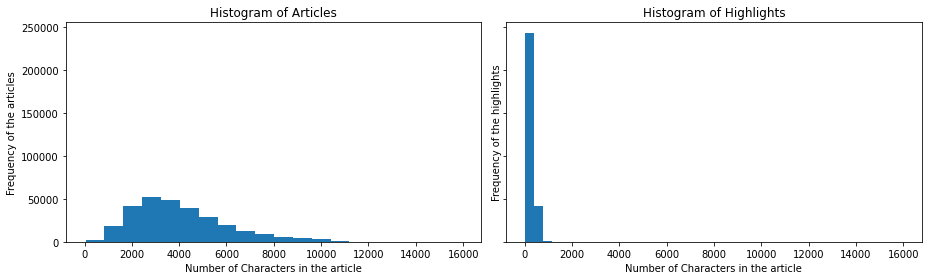

In [48]:
import matplotlib.pyplot as plt
_=fig, axs = plt.subplots(1, 2,sharex=True, sharey=True, figsize=(13,4), tight_layout=True)
# for i, ax in enumerate(axs.flat):
#     ax.hist()
#     ax.set_title(f'Title {i}')
# _=plt.xlabel("Number of Characters in the article")
# _=plt.ylabel("Frequency of the articles")
_=axs[0].hist(len_of_articles, bins=20)
_=axs[0].set_title("Histogram of Articles")
_=axs[0].set_xlabel("Number of Characters in the article")
_=axs[0].set_ylabel("Frequency of the articles")
_=axs[1].hist(len_of_highlights, bins=20)
_=axs[1].set_title("Histogram of Highlights")
_=axs[1].set_xlabel("Number of Characters in the article")
_=axs[1].set_ylabel("Frequency of the highlights")
# _=fig.set_size_inches(20,9)
# _=fig.suptitle("Histogram of Article/Summary")
# _=axs.set_xlabel("Number of Characters in the article")
# _=axs.set_ylabel("Frequency of the articles")
# _=axs.set_title("Histogram of Article/Summary")

In [9]:
 articles = ''
for article in df['article'][:10]:
  articles += article.decode('utf-8')

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Download the puctuations
nltk.download('punkt')
# Download the stop-words
nltk.download('stopwords')
articles_processed = re.sub(re.compile('<.*?>'),'',articles)
articles_processed = re.sub('[^A-Za-z0-9]+',' ',articles_processed)
articles_processed = articles_processed.lower()
articles_tokens = word_tokenize(articles_processed)
stop_words= stopwords.words('english')
stop_words.extend(['from', 'mr', 'said','subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', '000'
'try', 'many', 'applause', 'one', 'year', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
filtered_articles = [word for word in articles_tokens if word not in stop_words]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer= WordNetLemmatizer()
lemm_articles = [lemmatizer.lemmatize(word) for word in filtered_articles]
lemm_articles.remove('000')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(max_features=10, min_df=1, stop_words='english')
X = vectorizer.fit_transform(lemm_articles)
idx_to_word = np.array(vectorizer.get_feature_names())
# apply NMF
nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

In [13]:
print("Topics:")
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))

Topics:
Topic 1: 000,amish,bannatyne,johnson,new,people,time,tomasz,year,state
Topic 2: 000,bannatyne,new,time,year,johnson,state,tomasz,amish,people
Topic 3: 000,amish,johnson,people,state,time,year,bannatyne,tomasz,new
Topic 4: 000,amish,bannatyne,johnson,new,people,state,time,year,tomasz
Topic 5: 000,amish,new,people,state,time,year,bannatyne,tomasz,johnson
Topic 6: amish,bannatyne,johnson,new,state,time,tomasz,year,000,people
Topic 7: amish,bannatyne,johnson,new,people,state,tomasz,year,000,time
Topic 8: 000,amish,bannatyne,people,state,tomasz,time,year,new,johnson
Topic 9: 000,johnson,new,people,state,time,tomasz,year,bannatyne,amish
Topic 10: 000,amish,johnson,new,state,tomasz,year,bannatyne,people,time
Topic 11: 000,amish,bannatyne,johnson,new,state,time,tomasz,year,people
Topic 12: 000,bannatyne,johnson,people,state,time,tomasz,year,new,amish
Topic 13: amish,bannatyne,johnson,people,state,time,tomasz,000,new,year
Topic 14: 000,amish,bannatyne,johnson,new,state,time,tomasz,peopl

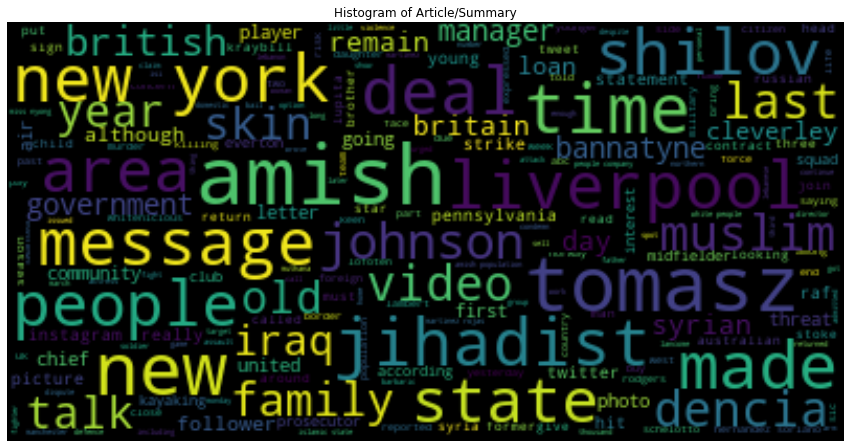

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# wordcloud = WordCloud().generate(cleaned)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(lemm_articles))
#print("Word-cloud for the Articles:" )


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig = plt.gcf()
_=plt.title("Histogram of Article/Summary")
_=fig.set_size_inches(15,9)
plt.show()

In [15]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 7.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=2a658262c32158ec3f3a9e50dd2997b2a0ec8a26026866b83b2f2ed43a6d0af6
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
lemm_articles.remove('000')
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=50          
                            )
data_vectorized = vectorizer.fit_transform(lemm_articles)
lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,
                                      learning_decay=0.7,
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [17]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print("Topics for the articles :")
print_topics(lda_model,vectorizer,20)

Topics for the articles :

Topic #0:
000 year liverpool day going letter message government amish iraq dencia islamic tomasz british skin shilov united photo britain air

Topic #1:
johnson family air cleverley star syrian dencia liverpool population photo instagram time going area video message pennsylvania government manager amish

Topic #2:
state message martinez talk dencia family government syrian letter russian instagram tomasz time shilov amish video day new season population

Topic #3:
deal muslim old iraq british letter bannatyne family going pennsylvania time star state johnson threat britain liverpool rojas air area

Topic #4:
new shilov russian government threat skin season star loan day state united muslim year player iraq cleverley syrian johnson photo

Topic #5:
amish people york pennsylvania united star going threat martinez jihadist rojas old liverpool skin loan letter message british instagram cleverley

Topic #6:
time bannatyne area british follower air dencia talk go

In [18]:
import pandas as pd
lda_output = lda_model.transform(data_vectorized)
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
docnames = ['Doc' + str(i) for i in range(len(lemm_articles))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
df_document_topics = df_document_topic.head(10).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc3,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc5,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1
Doc6,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,8
Doc7,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc8,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


In [19]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  11.456954
0       0.648955  71.707100       2        1  11.456954
7      71.019684   9.971006       3        1  10.711921
4       3.785981  33.185135       4        1  10.629139
9     -42.666500  -9.222070       5        1  10.215232
1      -3.621689 -43.526516       6        1   9.718543
2      -3.632402  -4.171708       7        1   9.552980
6     -36.584400  35.804413       8        1   9.221854
3      44.391380  50.615383       9        1   8.890728
8      40.235809 -31.591665      10        1   8.145695, topic_info=        Term       Freq      Total Category  logprob  loglift
27       new  27.000000  27.000000  Default  30.0000  30.0000
2      amish  25.000000  25.000000  Default  29.0000  29.0000
45    tomasz  21.000000  21.000000  Default  28.0000  28.0000
40     state  20.000000  20.000000  Default  27.0000  27.0000
0        000  21.000000  21.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
19   johnson   0.121011  17.921873  Topic10  -6.0078  -2.4902
24  martinez   0.121011  11.704140  Topic10  -6.0078  -2.0641
27       new   0.121011  27.631891  Topic10  -6.0078  -2.9232
28       old   0.121011  11.742755  Topic10  -6.0078  -2.0674
2      amish   0.121011  25.437819  Topic10  -6.0078  -2.8404

[433 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         2  0.982289           000
1         6  0.901551           air
2         1  0.982789         amish
3         8  0.922084          area
4         8  0.964322     bannatyne
5         3  0.845560       britain
6         8  0.922626       british
7         6  0.869497     cleverley
8         2  0.887395           day
9         9  0.932502          deal
10       10  0.902487        dencia
11        6  0.968831        family
12        3  0.954836      follower
13        2  0.891949         going
14        4  0.908728    government
15        5  0.876124     instagram
16        9  0.903232          iraq
17        3  0.933714       islamic
18        3  0.917782      jihadist
19        6  0.948562       johnson
20        2  0.809728        letter
21        2  0.942384     liverpool
22       10  0.913565          loan
23        5  0.887301       manager
24        7  0.939838      martinez
25        7  0.926807       message
26        9  0.924193        muslim
27        4  0.977132           new
28        9  0.936748           old
29        1  0.860452  pennsylvania
30        1  0.969144        people
31        5  0.920383         photo
32        5  0.896312        player
33        5  0.958844    population
34        5  0.890636         rojas
35        4  0.867922       russian
36       10  0.927767        season
37        4  0.927079        shilov
38        5  0.925150          skin
39        6  0.873609          star
40        7  0.981578         state
41       10  0.924708        syrian
42        7  0.949864          talk
43        4  0.866535        threat
44        8  0.978238          time
45        3  0.954642        tomasz
46        1  0.843645        united
47        3  0.871498         video
48        2  0.942226          year
49        1  0.942718          york, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 8, 5, 10, 2, 3, 7, 4, 9])

In [20]:
from nltk import pos_tag,ne_chunk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
article_tags = ne_chunk(pos_tag(word_tokenize(articles)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [21]:
article_entities = []
for i in article_tags:
  if len(i) < 2:
    if 'NNP' in str(i) or 'NNPS' in str(i):
        article_entities.append(str(i))

In [22]:
from nltk.probability import FreqDist
article_freq_entities = FreqDist(article_entities)
article_freq_entities
article_keys = sorted(article_freq_entities.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
article_ent = []
article_freq_count = []
for i in article_keys:
  article_ent.append(i[0])
  article_freq_count.append(i[1])

In [23]:
import pandas as pd
article_words = []
article_entities = []
for i in article_ent:
  i = i.replace("/NNP)","")
  i = i.replace("(","")
  i = i.replace("/NNPS)","")
  article_words.append(i.split()[1])
  article_entities.append(i.split()[0])

article_entities_df = pd.DataFrame({'Keyword':article_words,'Entity':article_entities,'Frequency':article_freq_count})
article_entities_df
article_count = 0
article_total_count = article_entities_df['Frequency'].sum()
article_cumulative_frequency = []
article_cumulative_frequency_coverage = []
for i in range(article_entities_df.shape[0]):
  article_count = article_count+article_entities_df['Frequency'][i]
  article_cumulative_frequency.append(article_count)
  article_cumulative_frequency_coverage.append((article_count/article_total_count)*100)
article_entities_df['Cumulative Frequency'] = article_cumulative_frequency
article_entities_df['Cumulative Frequency Coverage'] = article_cumulative_frequency_coverage

Distribution of types of Entities


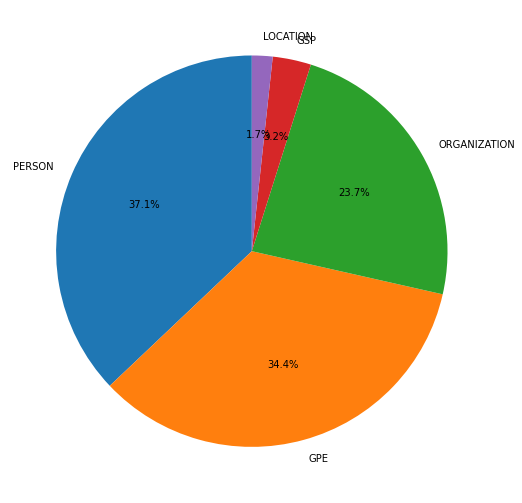

In [24]:
import matplotlib.pyplot as plt

a = list(article_entities_df['Entity'].unique())
b = []
for i in a:
  b.append(article_entities_df[article_entities_df['Entity'] == i]['Frequency'].sum())
article_pie_chart_entities_df = pd.DataFrame({'Entity':a,'Frequency':b})
explode = (0,0,0,0.5)
print("Distribution of types of Entities")
plt.pie(b, labels=a,autopct='%1.1f%%', startangle=90)
_=fig=plt.gcf()
_=fig.set_size_inches(30,9)
#_=fig=plt.title('Distribution of types of Entities')
plt.show()